best weight: [ 1.05380205 -1.37766937 -0.93782504]
minimum classification error: 0.04


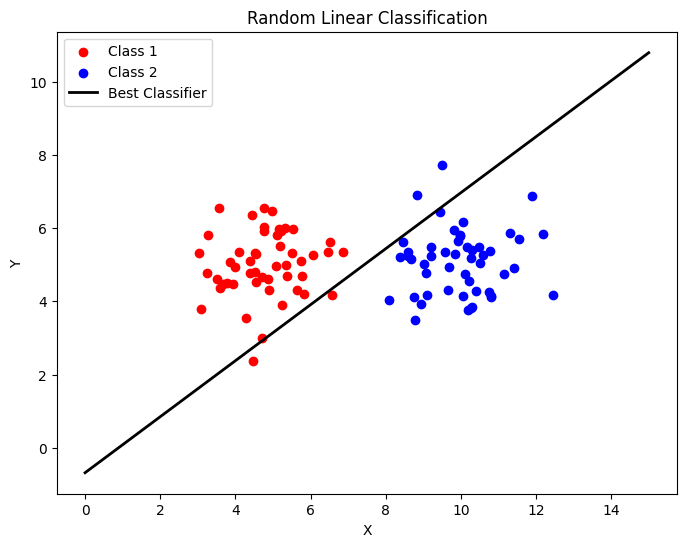

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
Ax=np.random.normal(loc=5,scale=1,size=50)
Ay=np.random.normal(loc=5,scale=1,size=50)

Bx=np.random.normal(loc=10,scale=1,size=50)
By=np.random.normal(loc=5,scale=1,size=50)

x = np.vstack((np.hstack((Ax, Bx)), np.hstack((Ay, By)))).T
y=np.array([0]*len(Ax)+[1]*len(Bx))

def predict_line(x,w):
  return(x[:,0]*w[0]+x[:,1]*w[1]+w[2]>0).astype(int)

def classification_error(y_true, y_pred):
    return np.mean(y_true != y_pred)


k=100
best_w=None
min_error=1
for _ in range(k):
  w=np.random.randn(3)
  y_pred=predict_line(x,w)
  err=classification_error(y, y_pred)

  if err<min_error:
    min_error=err
    best_w=w

print('best weight:',best_w)
print('minimum classification error:',min_error)

plt.figure(figsize=(8,6))
plt.scatter(Ax,Ay,color='red',label='Class 1')
plt.scatter(Bx,By,color='blue',label='Class 2')

x_vals=np.linspace(0,15,100)
y_vals=-(best_w[0]*x_vals+best_w[2])/best_w[1]
plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Best Classifier')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Random Linear Classification")
plt.show()